# Data Visualization for Master Thesis

Introduction

## Import Resources

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Visualization

### Vis 1

In [4]:
path_1_1 = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_1_1.csv"
path_1_2 = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_1_2.csv"
path_1_3 = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_1_3.csv"

df_1_1 = pd.read_csv(path_1_1, index_col=False)
df_1_2 = pd.read_csv(path_1_2, index_col=False)
df_1_3 = pd.read_csv(path_1_3, index_col=False)

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = '%s' % n
    return percentile_

In [5]:
# column.agg([np.sum, np.mean, np.std, np.median, np.var, np.min, np.max, percentile(25), percentile(75)])
#df_1_1.quantile([.25, .75])
plot_1_1 = df_1_1.groupby(['n', 'e']).agg([np.mean, percentile(25), percentile(75)]).reset_index()
plot_1_2 = df_1_2.groupby(['n', 'e']).agg([np.mean, percentile(25), percentile(75)]).reset_index()
plot_1_3 = df_1_3.groupby(['n', 'e', 'r']).agg([np.mean, percentile(25), percentile(75)]).reset_index()

In [6]:
plot_1_1.columns = ['_'.join(col) for col in plot_1_1.columns]
plot_1_2.columns = ['_'.join(col) for col in plot_1_2.columns]
plot_1_3.columns = ['_'.join(col) for col in plot_1_3.columns]

In [21]:
plot_1_1


,n_,e_,s_mean,s_25,s_75,F-1 Score_mean,F-1 Score_25,F-1 Score_75,MCC Score_mean,MCC Score_25,MCC Score_75,AUC Score_mean,AUC Score_25,AUC Score_75,ACC Score_mean,ACC Score_25,ACC Score_75
0,1,500,50.5,25.75,75.25,0.862253,0.833333,0.901961,0.769152,0.713607,0.835791,0.883067,0.857588,0.915281,0.883067,0.857588,0.915281


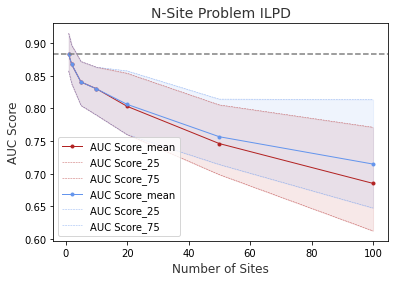

In [129]:
# Plot mean estimate as a line
plt.plot('n_', 'AUC Score_mean', data = plot_1_2, linewidth=1, alpha=1, color="firebrick", marker='.')
plt.plot('n_', 'AUC Score_25', data = plot_1_2, linewidth=0.5, alpha=0.7, color="firebrick", linestyle='--')
plt.plot('n_', 'AUC Score_75', data = plot_1_2, linewidth=0.5, alpha=0.7, color="firebrick", linestyle='--')

# Fill between the upper and lower bands
plt.fill_between(x = 'n_', 
                 y1 = 'AUC Score_25', y2 = 'AUC Score_75', 
                 data = plot_1_2, alpha=0.1, color="firebrick")

plt.plot('n_', 'AUC Score_mean', data = plot_1_3, linewidth=1, alpha=1, color="cornflowerblue", marker='.')
plt.plot('n_', 'AUC Score_25', data = plot_1_3, linewidth=0.5, alpha=0.7, color="cornflowerblue", linestyle='--')
plt.plot('n_', 'AUC Score_75', data = plot_1_3, linewidth=0.5, alpha=0.7, color="cornflowerblue", linestyle='--')

# Fill between the upper and lower bands
plt.fill_between(x = 'n_', 
                 y1 = 'AUC Score_25', y2 = 'AUC Score_75', 
                 data = plot_1_3, alpha=0.1, color="cornflowerblue")

plt.axhline(y=0.883067, color='grey', linestyle='--')

plt.title("N-Site Problem ILPD", alpha=0.8, fontsize=14)
plt.xlabel("Number of Sites", alpha=0.8, fontsize=12)
plt.ylabel("AUC Score", alpha=0.8, fontsize=12)

plt.legend()
plt.show()


### Vis 2: Inter-Site Sample Size Imbalance

In [116]:
path_2_2_u = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_2_2_unweighted.csv"
path_2_2_w = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_2_2_weighted.csv"
path_2_3_u = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_2_3_unweighted.csv"
path_2_3_w = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_HCC_2_3_weighted.csv"

df_2_2_u = pd.read_csv(path_2_2_u, index_col=False).groupby(['Degree Imbalance']).agg('mean').reset_index()
df_2_2_w = pd.read_csv(path_2_2_w, index_col=False).groupby(['Degree Imbalance']).agg('mean').reset_index()
df_2_3_u = pd.read_csv(path_2_3_u, index_col=False).groupby(['Degree Imbalance']).agg('mean').reset_index()
df_2_3_w = pd.read_csv(path_2_3_w, index_col=False).groupby(['Degree Imbalance']).agg('mean').reset_index()

df_2_2_u = df_2_2_u.rename(columns={"F-1 Score": "f_1_22u", "MCC Score": "mcc_22u", "AUC Score": "auc_22u", "ACC Score": "acc_22u", "Degree Imbalance": "imb"}).drop(columns=['s'])
df_2_2_w = df_2_2_w.rename(columns={"F-1 Score": "f_1_22w", "MCC Score": "mcc_22w", "AUC Score": "auc_22w", "ACC Score": "acc_22w", "Degree Imbalance": "imb"}).drop(columns=['s'])
df_2_3_u = df_2_3_u.rename(columns={"F-1 Score": "f_1_23u", "MCC Score": "mcc_23u", "AUC Score": "auc_23u", "ACC Score": "acc_23u", "Degree Imbalance": "imb"}).drop(columns=['s'])
df_2_3_w = df_2_3_w.rename(columns={"F-1 Score": "f_1_23w", "MCC Score": "mcc_23w", "AUC Score": "auc_23w", "ACC Score": "acc_23w", "Degree Imbalance": "imb"}).drop(columns=['s'])

In [117]:
df_2_3_w

,imb,f_1_23w,mcc_23w,auc_23w,acc_23w
0,0.05,0.794045,0.667746,0.827594,0.827594
1,0.10,0.825891,0.711056,0.851835,0.851835
2,0.15,0.840285,0.734363,0.864205,0.864205
3,0.20,0.844245,0.742730,0.867760,0.867760
4,0.25,0.852079,0.753846,0.874449,0.874449
5,0.30,0.857559,0.762523,0.878690,0.878690
6,0.35,0.860155,0.766045,0.880748,0.880748
7,0.40,0.865500,0.774443,0.885421,0.885421
8,0.45,0.869705,0.781664,0.889044,0.889044
9,0.50,0.865590,0.776056,0.885660,0.885660


In [120]:
df_2_x_x = df_2_2_u.join(df_2_2_w.set_index('imb'), on='imb').join(df_2_3_u.set_index('imb'), on='imb').join(df_2_3_w.set_index('imb'), on='imb')
#pd.merge(df_2_2_u, df_2_2_w, on="Degree Imbalance", how='inner')

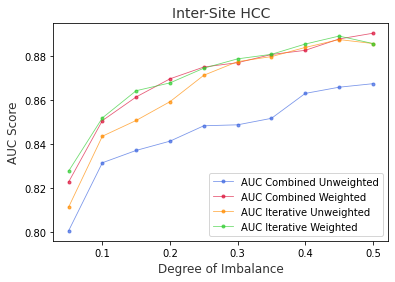

In [127]:
# Plot mean estimate as a line
# plt.plot('n_', 'AUC Score_mean', data = plot_1_2, linewidth=1, alpha=1, color="crimson", marker='o')
plt.plot('imb', 'auc_22u', data = df_2_x_x, linewidth=0.8, alpha=0.7, label='AUC Combined Unweighted', color="royalblue", linestyle='-', marker='.')
plt.plot('imb', 'auc_22w', data = df_2_x_x, linewidth=0.8, alpha=0.7, label='AUC Combined Weighted', color="crimson", linestyle='-', marker='.')
plt.plot('imb', 'auc_23u', data = df_2_x_x, linewidth=0.8, alpha=0.7, label='AUC Iterative Unweighted', color="darkorange", linestyle='-', marker='.')
plt.plot('imb', 'auc_23w', data = df_2_x_x, linewidth=0.8, alpha=0.7, label='AUC Iterative Weighted', color="limegreen", linestyle='-', marker='.')

# plt.axhline(y=0.883067, color='grey', linestyle='--')

plt.title("Inter-Site HCC", alpha=0.8, fontsize=14)
plt.xlabel("Degree of Imbalance", alpha=0.8, fontsize=12)
plt.ylabel("AUC Score", alpha=0.8, fontsize=12)

# plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.legend()
plt.show()


### Vis 3: Communication Efficiency

In [98]:
# nrow = 2
# ncol = 2
# 
# fig, axs = plt.subplots(nrow, ncol)
# for i, ax in enumerate(fig.axes):
#     # ax.set_ylabel(str(i))
#     print(i)
#     print(ax)
# 
# plt.show()

In [247]:
path_comm_effi = "/Users/greg/Downloads/AR_Master_Thesis/output/vis_Cred_comm_effi.csv"
df = pd.read_csv(path_comm_effi, index_col=False)
df

,s,r,v,n,e,f_1,mcc,auc,acc
0,1,10,1,10,1,0.727273,0.519547,0.762994,0.762994
1,1,10,2,10,1,0.745098,0.572187,0.784304,0.784304
2,1,10,3,10,1,0.793651,0.637214,0.818607,0.818607
3,1,10,4,10,1,0.775510,0.636715,0.811331,0.811331
4,1,10,5,10,1,0.833333,0.709499,0.859148,0.859148
...,...,...,...,...,...,...,...,...,...
3995,10,10,96,10,10,0.754717,0.577050,0.790021,0.790021
3996,10,10,97,10,10,0.754717,0.577050,0.790021,0.790021
3997,10,10,98,10,10,0.754717,0.577050,0.790021,0.790021
3998,10,10,99,10,10,0.754717,0.577050,0.790021,0.790021


In [257]:
path_comm_effi = "/Users/greg/Downloads/AR_Master_Thesis/output/test_vis_HCC_comm_effi.csv"
df = pd.read_csv(path_comm_effi, index_col=False)

# df.groupby(['r', 'v', 'n', 'e']).agg(["mean", "median", "var"]).reset_index()
df = df.groupby(['r', 'n', 'e', 'v']).agg(["mean"]).reset_index()
df.columns = ['_'.join(col) for col in df.columns]
#df.head(103)
# df[(df['v_'] % df['n_']) == 0]

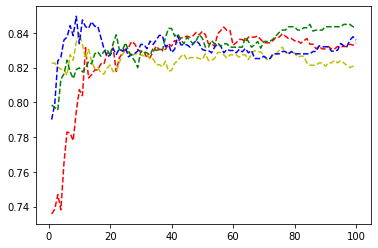

In [260]:
path_comm_effi = "/Users/greg/Downloads/AR_Master_Thesis/output/test_vis_HCC_comm_effi.csv"
df = pd.read_csv(path_comm_effi, index_col=False)
df = df.groupby(['r', 'n', 'e', 'v']).agg(["mean"]).reset_index()
df.columns = ['_'.join(col) for col in df.columns]

# df = df[(df['v_'] % df['n_']) == 0]
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

ax.plot(df[df["e_"] == 1]["v_"], df[df["e_"] == 1]["auc_mean"], color='r', linestyle='--')
ax.plot(df[df["e_"] == 2]["v_"], df[df["e_"] == 2]["auc_mean"], color='y', linestyle='--')
ax.plot(df[df["e_"] == 5]["v_"], df[df["e_"] == 5]["auc_mean"], color='b', linestyle='--')
ax.plot(df[df["e_"] == 10]["v_"], df[df["e_"] == 10]["auc_mean"], color='g', linestyle='--')
# Plot Seattle data, setting data appearance

# Call show to display the resulting plot
plt.show()

In [70]:
path = "/Users/greg/Downloads/AR_Master_Thesis/data/creditcard.csv"
data = pd.read_csv(path)
data.shape

(284807, 31)

In [ ]:
plt.style.use("tableau-colorblind10")
fig, ax = plt.subplots(2, 2, sharey=True) # Sharing the y-axis range

# Decrase interval thickness as interval widens
sizes =      [      15,    10,     5]
int_widths = ['90% CI', '95%', '99%']
z_scores =   [    1.67,  1.96,  2.58]

for percent, Z, size in zip(int_widths, z_scores, sizes):
    plt.hlines(y = rocket_model.pollutant, 
               xmin = rocket_model['est'] - Z*rocket_model['std_err'],
               xmax = rocket_model['est'] + Z*rocket_model['std_err'],
               label = percent, 
               # Resize lines and color them gray
               linewidth = size, 
               color = 'gray') 
    
# Add point estimate
plt.plot('est', 'pollutant', 'wo', data = rocket_model, label = 'Point Estimate')

plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

In [ ]:
"""         plt.ioff()
        plt.figure()

        plt.plot(local_metric.number_sites,
                 local_metric["25%"], linewidth=1, alpha=0.7, color="firebrick")
        plt.plot(local_metric.number_sites,
                 local_metric["75%"], linewidth=1, alpha=0.7, color="firebrick")
        plt.plot(local_metric.number_sites,
                 local_metric["mean"], linewidth=1, alpha=1, color="firebrick")
        plt.fill_between(local_metric.number_sites, local_metric["25%"],
                         local_metric["75%"], alpha=0.3, color="firebrick")

        plt.plot(global_metric.number_sites,
                 global_metric["25%"], linewidth=1, alpha=0.7, color="cornflowerblue")
        plt.plot(global_metric.number_sites,
                 global_metric["75%"], linewidth=1, alpha=0.7, color="cornflowerblue")
        plt.plot(global_metric.number_sites,
                 global_metric["mean"], linewidth=1, alpha=1, color="cornflowerblue")
        plt.fill_between(global_metric.number_sites, global_metric["25%"],
                         global_metric["75%"], alpha=0.3, color="cornflowerblue")

        sct1 = plt.scatter(global_metric.number_sites,
                           global_metric["mean"], color="cornflowerblue", marker="o", s=20)
        sct2 = plt.scatter(local_metric.number_sites,
                           local_metric["mean"], color="firebrick", marker="o", s=20)

        title = dataset_name + " - " + method + " method, " + \
            str(int(fraction*100)) + " % of features dropped"
        plt.title(title, alpha=0.8, fontsize=14)
        plt.xlabel("Number of Sites", alpha=0.8, fontsize=12)
        plt.ylabel(metric_name, alpha=0.8, fontsize=12) """